# Simulation on Bernstein-Vazirani Algorthm

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import pylatexenc
import matplotlib.pyplot as plt

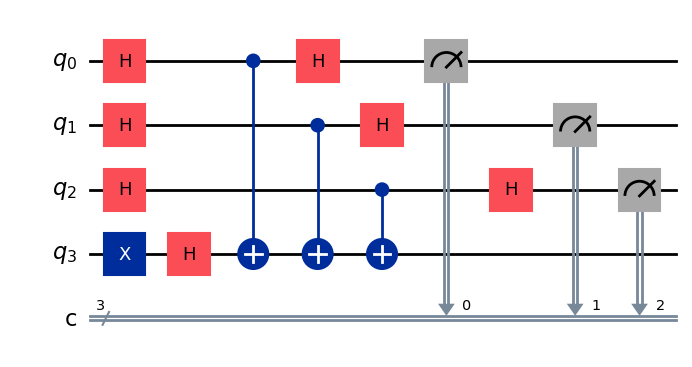

In [14]:
# 隐藏字符串 (比如 s = 1011)
s = '111'
n = len(s)

qc = QuantumCircuit(n + 1, n)
qc.x(n)                # 辅助比特设成 |1>
qc.h(range(n + 1))     # Hadamard 作用于所有比特

# Oracle：若 s_i=1， 对应控制X 跨到辅助位
for i, bit in enumerate(s):
    if bit == '1':
        qc.cx(i, n)

qc.h(range(n))         # 对前 n 比特再施加 Hadamard
qc.measure(range(n), range(n))
qc.draw(output='mpl')

In [15]:
# 使用 AerSimulator
sim = AerSimulator()
qc_t = transpile(qc, sim)
job = sim.run(qc_t, shots=1024)
result = job.result()
counts = result.get_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

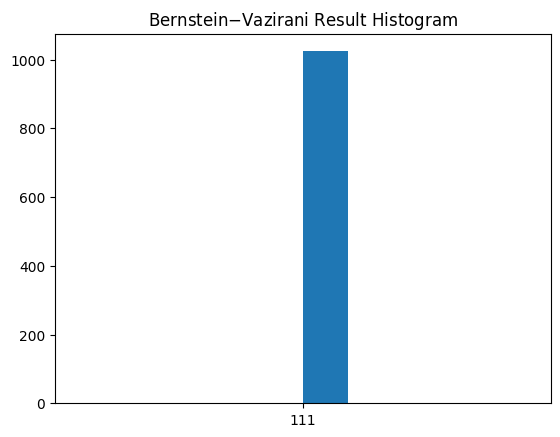

In [16]:
reversed_counts = {k[::-1]: v for k, v in counts.items()}
plt.hist(reversed_counts,weights=counts.values())
plt.title("Bernstein$-$Vazirani Result Histogram")
plt.show